#### Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

The client is a housing planner that must set prices and wants to use market data to do so.  It is necessary to know the impact on the housing price of various real estate metrics, so that a price can be estimated. 

# Data Understanding

The data is housing data from a Northwestern county and comes from the county government.  Key data categories include price, number of rooms, various square footage metrics, and age of the house. Each row of data represents a different house sold. The distribution of the houses is such that nearly all observations are within the Greater Seattle Area (King County) while the rest are distributed over the entire United States.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('./data/kc_house_data.csv')

<AxesSubplot:xlabel='long', ylabel='lat'>

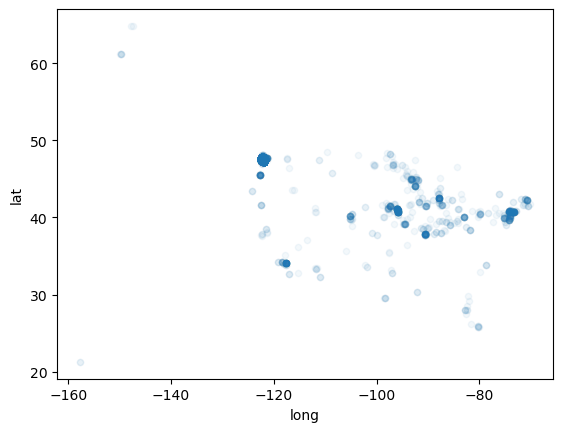

In [3]:
data.plot(kind = 'scatter', x = "long", y="lat", alpha=.05)

nearly all observations are within the Greater Seattle Area (King County) while the rest are distributed over the entire United States.

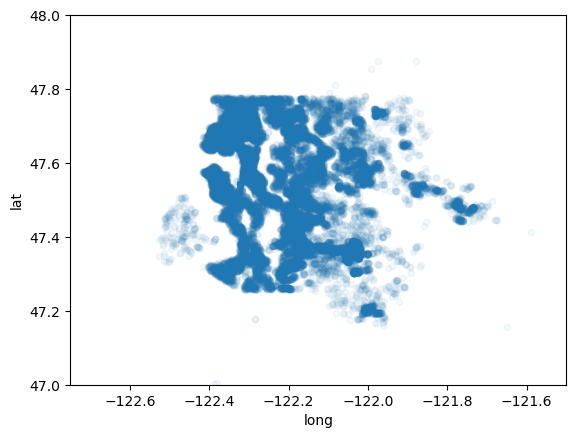

In [4]:
fig, ax = (15,5)
data.plot(kind = 'scatter', x = "long", y="lat", alpha=.05)
plt.ylim(47,48)
plt.xlim(-122.75,-121.5);

There appear to be some patterns/dividing line in King County (non-outlier) map data.

In [5]:
data=data.drop(data.loc[data['lat']<47.12].index)

In [6]:
data=data.drop(data.loc[47.8<data['lat']].index)

In [7]:
data=data.drop(data.loc[data['long']<-122.56].index)

In [8]:
data=data.drop(data.loc[-121.75<data['long']].index)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29022 non-null  int64  
 1   date           29022 non-null  object 
 2   price          29022 non-null  float64
 3   bedrooms       29022 non-null  int64  
 4   bathrooms      29022 non-null  float64
 5   sqft_living    29022 non-null  int64  
 6   sqft_lot       29022 non-null  int64  
 7   floors         29022 non-null  float64
 8   waterfront     29022 non-null  object 
 9   greenbelt      29022 non-null  object 
 10  nuisance       29022 non-null  object 
 11  view           29022 non-null  object 
 12  condition      29022 non-null  object 
 13  grade          29022 non-null  object 
 14  heat_source    29001 non-null  object 
 15  sewer_system   29011 non-null  object 
 16  sqft_above     29022 non-null  int64  
 17  sqft_basement  29022 non-null  int64  
 18  sqft_g

In [10]:
data.price.mean()

1113289.6514712977

In [11]:
data.price.max()

30750000.0

In [12]:
data.price.median()

865000.0

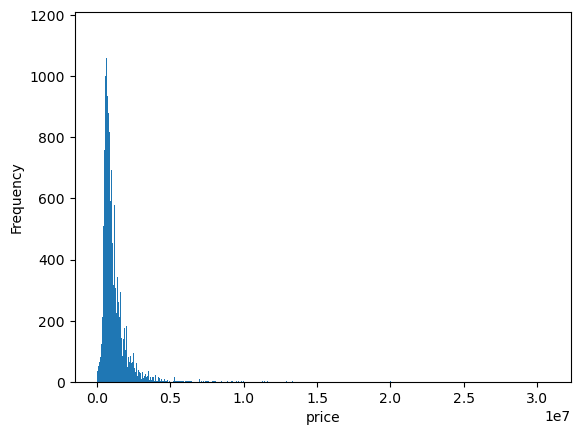

In [13]:
fig, ax = plt.subplots()
data.price.plot(kind='hist', bins=1000)

ax.set_xlabel("price");

Prices have a non-normal, right skewed distribution, with potential outliers.  The median is 865,000. The mean is 1,113,290. 

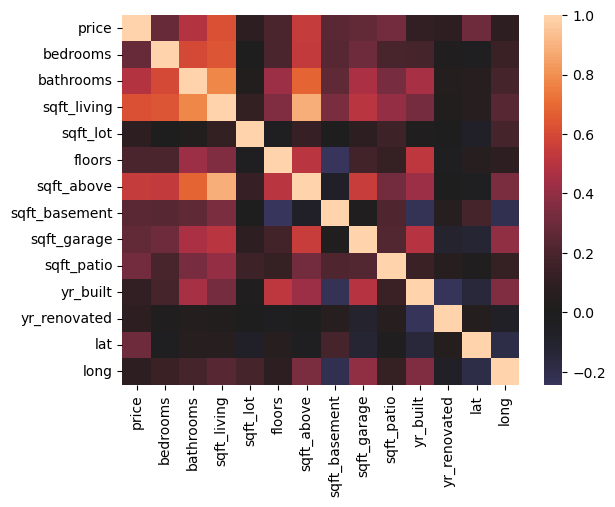

In [14]:

sns.heatmap(data.iloc[:,2:].corr(), center=0);

Sqft_living most correlated with price.  Also highly correlated to other potential predictors. 

In [15]:
abs(data.corr()) > 0.5

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False
bedrooms,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False
sqft_living,False,True,True,True,True,False,False,True,False,True,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,True,False,False,False,True,False,False,False
sqft_above,False,True,True,True,True,False,True,True,False,True,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_garage,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False


# Data Analysis

In [16]:
data.head(50)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.355910
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
5,2807100156,7/20/2021,625000.0,2,1.0,1190,5688,1.0,NO,NO,...,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.763470,-122.340155
6,5122400111,11/17/2021,1317227.0,3,3.0,2080,27574,1.0,NO,NO,...,PRIVATE,2080,0,0,150,1951,0,"2633 Southwest 164th Place, Burien, Washington...",47.455470,-122.367220
7,7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
8,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
9,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29022 non-null  int64  
 1   date           29022 non-null  object 
 2   price          29022 non-null  float64
 3   bedrooms       29022 non-null  int64  
 4   bathrooms      29022 non-null  float64
 5   sqft_living    29022 non-null  int64  
 6   sqft_lot       29022 non-null  int64  
 7   floors         29022 non-null  float64
 8   waterfront     29022 non-null  object 
 9   greenbelt      29022 non-null  object 
 10  nuisance       29022 non-null  object 
 11  view           29022 non-null  object 
 12  condition      29022 non-null  object 
 13  grade          29022 non-null  object 
 14  heat_source    29001 non-null  object 
 15  sewer_system   29011 non-null  object 
 16  sqft_above     29022 non-null  int64  
 17  sqft_basement  29022 non-null  int64  
 18  sqft_g

In [18]:
data.heat_source.unique()

array(['Gas', 'Oil', 'Electricity', 'Gas/Solar', 'Electricity/Solar',
       'Other', nan, 'Oil/Solar'], dtype=object)

In [19]:
data.sewer_system.unique()

array(['PUBLIC', 'PRIVATE', 'PRIVATE RESTRICTED', nan,
       'PUBLIC RESTRICTED'], dtype=object)

In [20]:
data.yr_built.value_counts().sort_index()

1900     117
1901      39
1902      36
1903      56
1904      73
        ... 
2018     331
2019     259
2020     343
2021    1318
2022     251
Name: yr_built, Length: 123, dtype: int64

In [21]:
data.grade.unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '1 Cabin', '2 Substandard'], dtype=object)

In [22]:
data.condition.unique()

array(['Good', 'Average', 'Very Good', 'Fair', 'Poor'], dtype=object)

## Convert grade data to numeric

In [23]:
grade_array = list(data['grade'])

In [24]:
grade_array_split =[]
for i in grade_array:
    split = i.split(" ")
    grade_array_split.append(split[0])

In [25]:
grade_num= grade_array_split

In [26]:
data['grade_num']=grade_num

In [27]:
data['grade_num']=data['grade_num'].astype(int)

In [28]:
data['grade_num']

0        7
1        7
2        7
3        9
4        7
        ..
30150    8
30151    7
30152    7
30153    8
30154    7
Name: grade_num, Length: 29022, dtype: int32

<AxesSubplot:xlabel='grade_num', ylabel='price'>

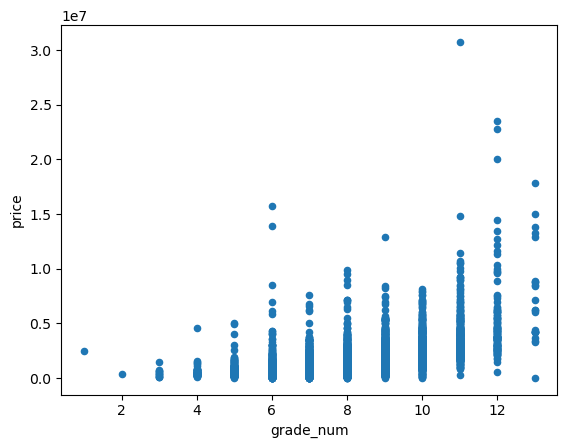

In [29]:
data.plot(kind = 'scatter', x = 'grade_num', y='price')

Apparent correlation between grade and price.

## Convert condition data to numeric

In [30]:
condition_num = data['condition'].replace({'Good': 3, 'Average':2, 'Very Good':4, 'Fair':1, 'Poor':0})

In [31]:
data['condition_num'] =condition_num

<AxesSubplot:xlabel='condition_num', ylabel='price'>

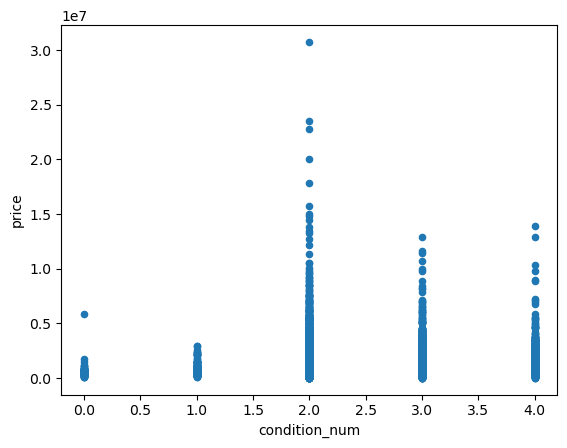

In [32]:
data.plot(kind = 'scatter', x = 'condition_num', y='price')

Some correlation between condition and price.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29022 non-null  int64  
 1   date           29022 non-null  object 
 2   price          29022 non-null  float64
 3   bedrooms       29022 non-null  int64  
 4   bathrooms      29022 non-null  float64
 5   sqft_living    29022 non-null  int64  
 6   sqft_lot       29022 non-null  int64  
 7   floors         29022 non-null  float64
 8   waterfront     29022 non-null  object 
 9   greenbelt      29022 non-null  object 
 10  nuisance       29022 non-null  object 
 11  view           29022 non-null  object 
 12  condition      29022 non-null  object 
 13  grade          29022 non-null  object 
 14  heat_source    29001 non-null  object 
 15  sewer_system   29011 non-null  object 
 16  sqft_above     29022 non-null  int64  
 17  sqft_basement  29022 non-null  int64  
 18  sqft_g

## Convert view variable to numeric

In [34]:
view_num = data['view'].replace({'NONE': 0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4})

In [35]:
data['view_num']=view_num

In [36]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,grade_num,condition_num,view_num
id,1.000000,-0.029777,-0.003910,-0.009854,-0.026248,-0.121002,0.036233,-0.020607,-0.015847,-0.006668,-0.041931,0.024931,-0.028768,-0.000410,0.013862,0.005402,-0.010836,-0.007610
price,-0.029777,1.000000,0.290882,0.487924,0.617183,0.085703,0.199624,0.547395,0.246291,0.266950,0.317956,0.105748,0.086514,0.299084,0.089415,0.577762,-0.012346,0.321968
bedrooms,-0.003910,0.290882,1.000000,0.593953,0.631284,-0.000379,0.194789,0.537776,0.237436,0.305357,0.192921,0.180289,0.012580,-0.016751,0.137826,0.388521,0.021841,0.051333
bathrooms,-0.009854,0.487924,0.593953,1.000000,0.780259,0.036096,0.427116,0.681415,0.262344,0.461469,0.333951,0.455002,0.043859,0.048819,0.184829,0.652401,-0.063770,0.159689
sqft_living,-0.026248,0.617183,0.631284,0.780259,1.000000,0.115622,0.354304,0.881426,0.338553,0.502945,0.405950,0.325989,0.037263,0.049595,0.237786,0.738025,-0.066313,0.241858
sqft_lot,-0.121002,0.085703,-0.000379,0.036096,0.115622,1.000000,-0.022163,0.126223,0.000687,0.083983,0.153948,0.011554,0.007585,-0.074523,0.180904,0.055215,-0.002972,0.089262
floors,0.036233,0.199624,0.194789,0.427116,0.354304,-0.022163,1.000000,0.504484,-0.242824,0.178207,0.122778,0.520803,-0.015489,0.049505,0.084809,0.471058,-0.264362,0.006164
sqft_above,-0.020607,0.547395,0.537776,0.681415,0.881426,0.126223,0.504484,1.000000,-0.071318,0.552937,0.320309,0.424914,0.009006,-0.021238,0.341197,0.718816,-0.149662,0.130204
sqft_basement,-0.015847,0.246291,0.237436,0.262344,0.338553,0.000687,-0.242824,-0.071318,1.000000,0.018493,0.216056,-0.225305,0.053079,0.187412,-0.218380,0.144763,0.088692,0.265413
sqft_garage,-0.006668,0.266950,0.305357,0.461469,0.502945,0.083983,0.178207,0.552937,0.018493,1.000000,0.227469,0.496589,-0.103803,-0.129896,0.392493,0.515276,-0.083186,0.024389


## Create dummy variables

In [37]:
data_wdum= pd.get_dummies(data, columns = ['waterfront','heat_source','greenbelt','nuisance','sewer_system'], drop_first=True)

In [38]:
data_wdum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               29022 non-null  int64  
 1   date                             29022 non-null  object 
 2   price                            29022 non-null  float64
 3   bedrooms                         29022 non-null  int64  
 4   bathrooms                        29022 non-null  float64
 5   sqft_living                      29022 non-null  int64  
 6   sqft_lot                         29022 non-null  int64  
 7   floors                           29022 non-null  float64
 8   view                             29022 non-null  object 
 9   condition                        29022 non-null  object 
 10  grade                            29022 non-null  object 
 11  sqft_above                       29022 non-null  int64  
 12  sqft_basement     

In [39]:
df = data_wdum

## Check correlations with new dummy variables

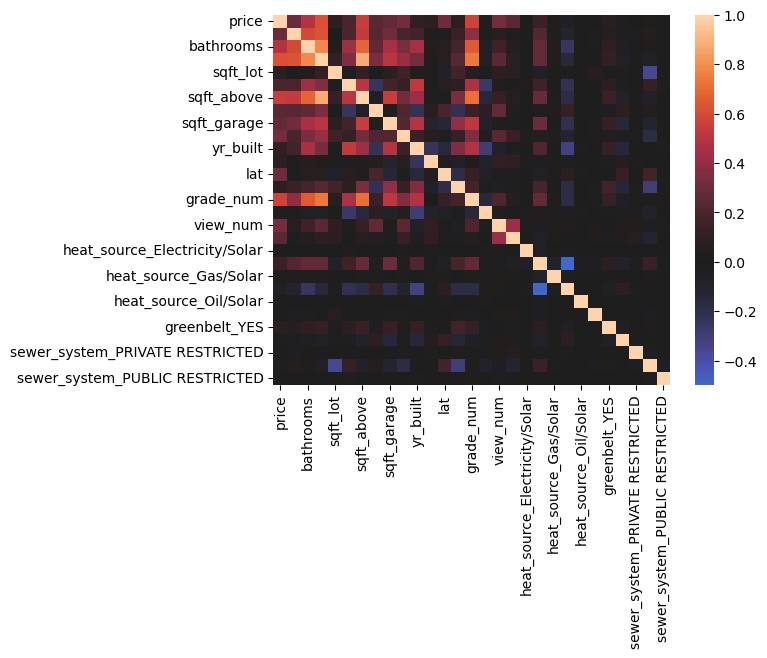

In [40]:

sns.heatmap(df.iloc[:,1:].corr(), center=0);

In [41]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,...,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,greenbelt_YES,nuisance_YES,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
id,1.000000,-0.029777,-0.003910,-0.009854,-0.026248,-0.121002,0.036233,-0.020607,-0.015847,-0.006668,...,0.072319,0.000648,-0.019038,-0.003037,-0.012518,0.057002,-0.052889,-0.009042,0.152617,-0.008608
price,-0.029777,1.000000,0.290882,0.487924,0.617183,0.085703,0.199624,0.547395,0.246291,0.266950,...,0.145362,0.037038,-0.071064,-0.002369,0.000569,0.068618,0.006468,-0.005387,0.022527,-0.000653
bedrooms,-0.003910,0.290882,1.000000,0.593953,0.631284,-0.000379,0.194789,0.537776,0.237436,0.305357,...,0.216746,0.013456,-0.100314,-0.008215,-0.018138,0.062557,-0.043141,-0.016186,0.041912,0.004799
bathrooms,-0.009854,0.487924,0.593953,1.000000,0.780259,0.036096,0.427116,0.681415,0.262344,0.461469,...,0.272899,0.033124,-0.254048,-0.007617,-0.013846,0.095076,-0.051060,-0.006655,0.031075,0.003879
sqft_living,-0.026248,0.617183,0.631284,0.780259,1.000000,0.115622,0.354304,0.881426,0.338553,0.502945,...,0.263925,0.031484,-0.150764,-0.003196,-0.007569,0.114615,-0.055115,-0.009742,-0.056398,0.002989
sqft_lot,-0.121002,0.085703,-0.000379,0.036096,0.115622,1.000000,-0.022163,0.126223,0.000687,0.083983,...,-0.077173,0.001013,0.008690,-0.001471,0.057893,-0.013669,0.009222,0.002080,-0.359646,-0.001551
floors,0.036233,0.199624,0.194789,0.427116,0.354304,-0.022163,1.000000,0.504484,-0.242824,0.178207,...,0.159387,0.004516,-0.216845,-0.005679,-0.000701,0.076623,-0.034453,-0.000405,0.120802,0.007331
sqft_above,-0.020607,0.547395,0.537776,0.681415,0.881426,0.126223,0.504484,1.000000,-0.071318,0.552937,...,0.282456,0.015699,-0.176387,-0.006440,-0.006924,0.134920,-0.090881,-0.010015,-0.076538,0.004446
sqft_basement,-0.015847,0.246291,0.237436,0.262344,0.338553,0.000687,-0.242824,-0.071318,1.000000,0.018493,...,-0.022283,0.031273,0.117894,0.005644,-0.002187,-0.035886,0.077093,-0.003633,0.046547,0.000486
sqft_garage,-0.006668,0.266950,0.305357,0.461469,0.502945,0.083983,0.178207,0.552937,0.018493,1.000000,...,0.292941,0.002343,-0.208457,-0.011121,-0.014594,0.127089,-0.146121,-0.009765,-0.115985,0.004622


In [42]:
df_c = df.loc[:,['price','sqft_living','heat_source_Electricity/Solar','waterfront_YES', 'view_num','yr_built','condition_num','grade_num','yr_renovated']]

In [43]:
df_c.corr()

,price,sqft_living,heat_source_Electricity/Solar,waterfront_YES,view_num,yr_built,condition_num,grade_num,yr_renovated
price,1.000000,0.617183,-0.008305,0.242572,0.321968,0.105748,-0.012346,0.577762,0.086514
sqft_living,0.617183,1.000000,-0.006277,0.080684,0.241858,0.325989,-0.066313,0.738025,0.037263
heat_source_Electricity/Solar,-0.008305,-0.006277,1.000000,-0.005798,0.012878,0.003748,0.015107,-0.005095,0.016314
waterfront_YES,0.242572,0.080684,-0.005798,1.000000,0.423719,-0.038356,0.001759,0.050836,0.098757
view_num,0.321968,0.241858,0.012878,0.423719,1.000000,-0.078009,0.027224,0.207214,0.109675
yr_built,0.105748,0.325989,0.003748,-0.038356,-0.078009,1.000000,-0.301170,0.478984,-0.236466
condition_num,-0.012346,-0.066313,0.015107,0.001759,0.027224,-0.301170,1.000000,-0.146578,-0.084353
grade_num,0.577762,0.738025,-0.005095,0.050836,0.207214,0.478984,-0.146578,1.000000,-0.007106
yr_renovated,0.086514,0.037263,0.016314,0.098757,0.109675,-0.236466,-0.084353,-0.007106,1.000000


Sqft_living most correlated with price. Also highly correlated are bathrooms, sqft_above, sqft_garage, grade, view.  Only categorical variable materially correlated with price is waterfront properties.

# Data Modeling

## Run baseline model

Start with one variable, the most correlated with price: Sqft_living

In [44]:
import statsmodels.api as sm

In [45]:
baseline_model = sm.OLS(df['price'], sm.add_constant(df['sqft_living']))
baseline_results = baseline_model.fit()

In [46]:
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                 1.786e+04
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:17:11   Log-Likelihood:            -4.3205e+05
No. Observations:               29022   AIC:                         8.641e+05
Df Residuals:                   29020   BIC:                         8.641e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.416e+04   9942.048     -9.471      0.000   -1.14e+05   -7.47e+04
sqft_living   567.3132      4.246    133.625      0.000     558.992     575.635
==============================================================================
Omnibus:                    41953.578   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         49427411.165
Skew:                           8.217   Prob(JB):                         0.00
Kurtosis:                     204.505   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

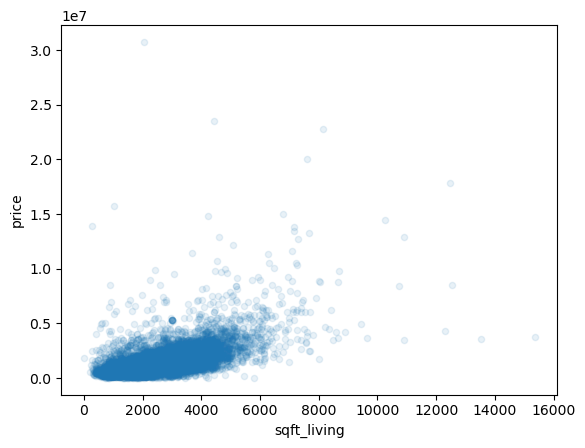

In [47]:
df.plot(kind = 'scatter',x='sqft_living',y= 'price', alpha = .1)

### Next model: Add to previous, variables with price correlation greater than .25 and sqft_living correlation less than .75 to increase rsquared.

In [48]:
df_X2 = df.loc[:,['sqft_living','bedrooms','sqft_garage', 'sqft_patio', 'grade_num', 'view_num']]


In [49]:
df_X2.head()

,sqft_living,bedrooms,sqft_garage,sqft_patio,grade_num,view_num
0,1180,4,0,40,7,0
1,2770,5,0,240,7,2
2,2880,6,0,0,7,2
3,2160,3,200,270,9,2
4,1120,2,550,30,7,0


In [50]:
model_2575 = sm.OLS(df['price'], sm.add_constant(df_X2))
model_2575_results = model_2575.fit()
model_2575_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     4050.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:17:11   Log-Likelihood:            -4.3018e+05
No. Observations:               29022   AIC:                         8.604e+05
Df Residuals:                   29015   BIC:                         8.604e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.067e+06   3.47e+04    -30.768      0.000   -1.14e+06   -9.99e+05
sqft_living   443.6263      7.490     59.227      0.000     428.945     458.308
bedrooms     -9.46e+04   5234.424    -18.074      0.000   -1.05e+05   -8.43e+04
sqft_garage  -291.8322     16.386    -17.810      0.000    -323.950    -259.715
sqft_patio    116.0772     17.604      6.594      0.000      81.573     150.582
grade_num     2.08e+05   5227.664     39.780      0.000    1.98e+05    2.18e+05
view_num     1.556e+05   4791.625     32.475      0.000    1.46e+05    1.65e+05
==============================================================================
Omnibus:                    42327.701   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53877696.717
Skew:                           8.341   Prob(JB):                         0.00
Kurtosis:                     213.419   Cond. No.                     2.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

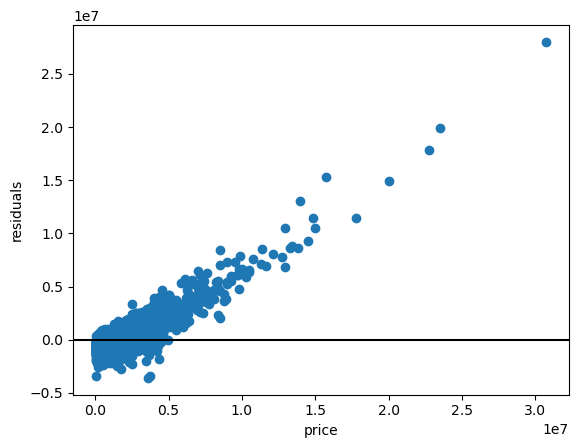

In [51]:
fig, ax = plt.subplots()

ax.scatter(df["price"], model_2575_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

Errors are but should not be increasing with the dependent variable.  There are potential linearity and heteroskedaticity issues.

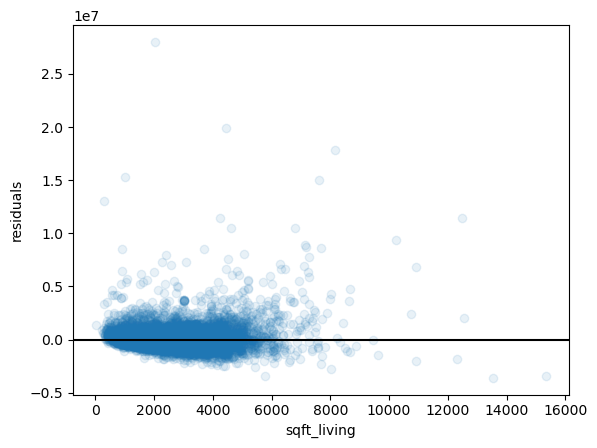

In [52]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_living"], model_2575_results.resid, alpha =.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

Variance in residuals is increasing with sqft_living variabe, suggesting some heteroskedaticity.

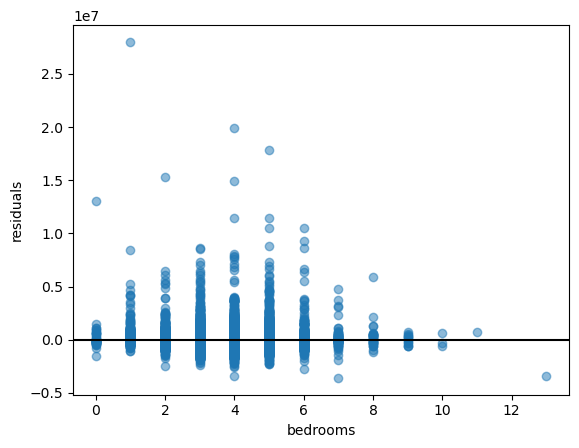

In [53]:
fig, ax = plt.subplots()

ax.scatter(df_X2["bedrooms"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("bedrooms")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, suggesting some heteroskedaticity.

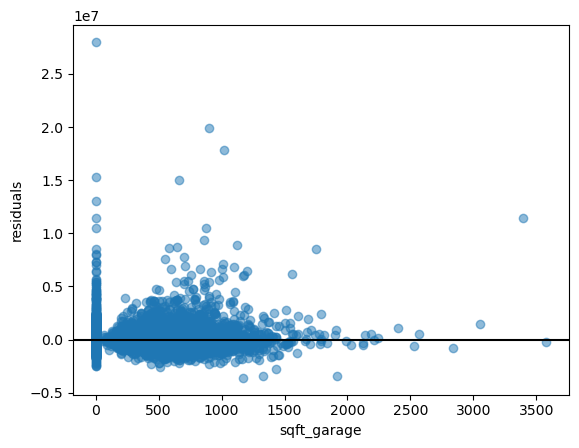

In [54]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_garage"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, generally decreasing, suggesting some heteroskedaticity.

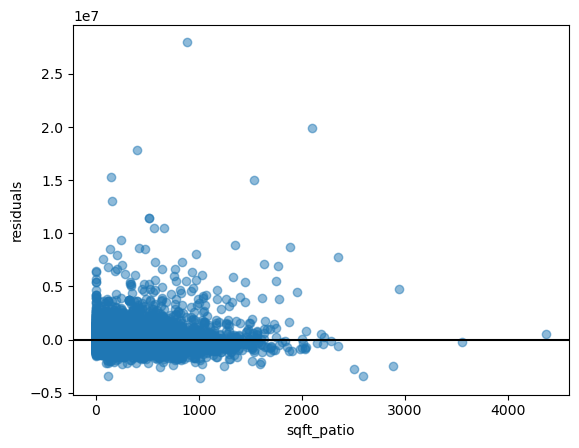

In [55]:
fig, ax = plt.subplots()

ax.scatter(df_X2["sqft_patio"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, generally decreasing, suggesting some heteroskedaticity.

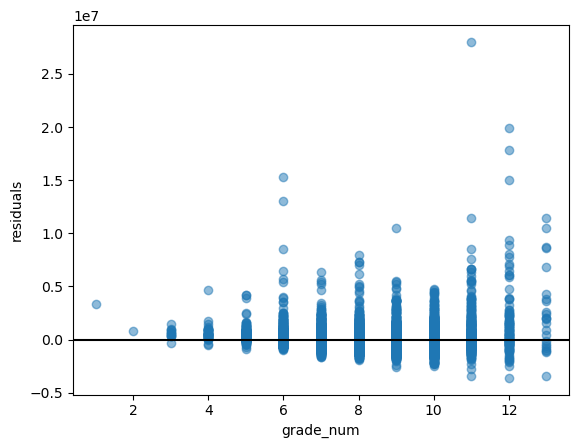

In [56]:
fig, ax = plt.subplots()

ax.scatter(df_X2["grade_num"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, generally increasing, suggesting some heteroskedaticity.

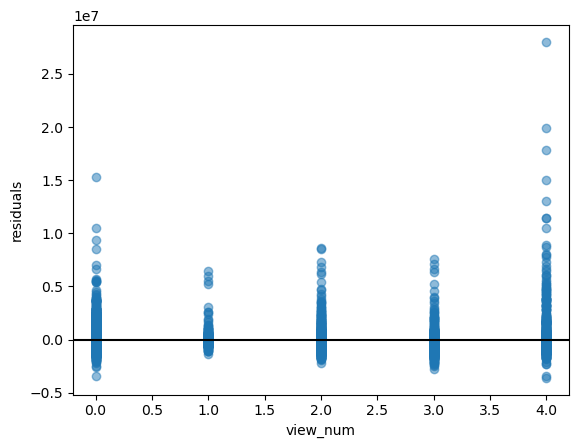

In [57]:
fig, ax = plt.subplots()

ax.scatter(df_X2["view_num"], model_2575_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num")
ax.set_ylabel("residuals");

There may be a pattern in the variance of residuals suggesting some heteroskedaticity.

eval_env: 1
eval_env: 1


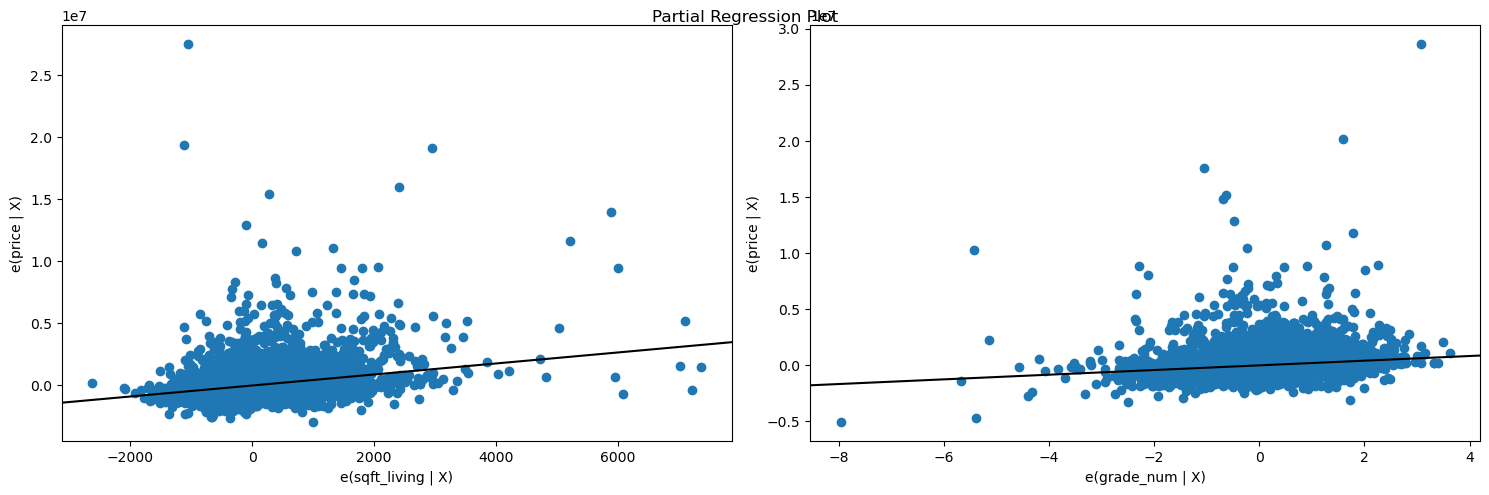

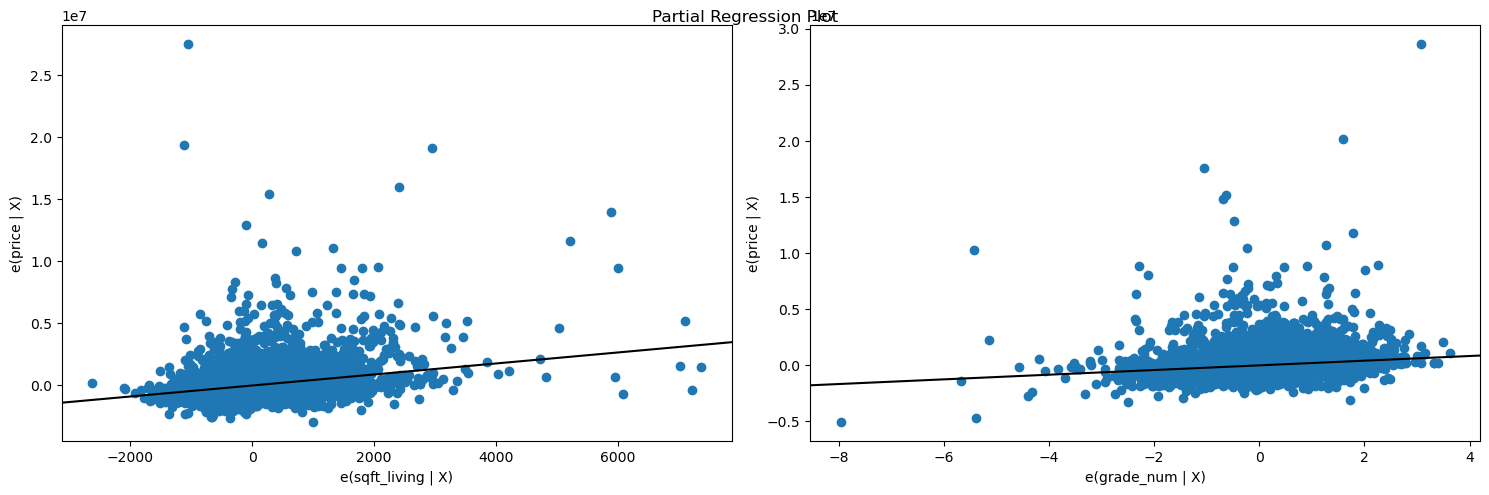

In [58]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model_2575_results, exog_idx=["sqft_living", "grade_num"], fig=fig)

There is a pattern in the partial regression plot, more for sqft_living than grade_num, suggesting some non-linearity or heteroskedaticity.

<AxesSubplot:ylabel='Frequency'>

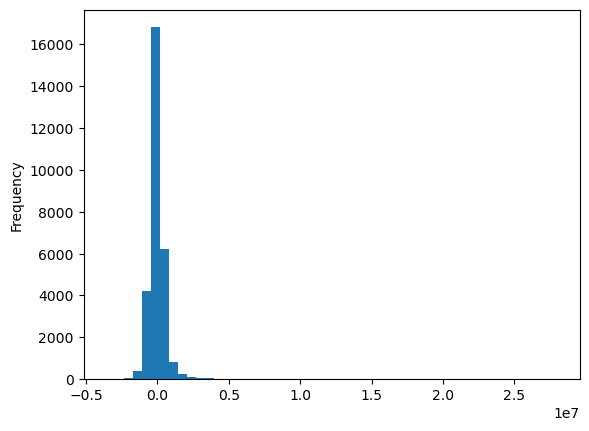

In [59]:
model_2575_results.resid.plot(kind ='hist', bins = 50)

The residuals appear fairly normal, however the Jarque-Bera null hypothesis of normality is rejected.

Below, check for non-normality in variables based on non-linearity issues.

<AxesSubplot:ylabel='Frequency'>

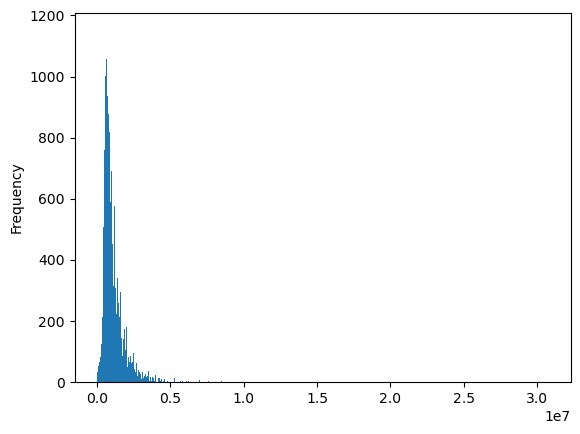

In [60]:
data.price.plot(kind='hist', bins=1000)

In [61]:
from scipy.stats import kurtosis, skew

In [62]:
skew(data['price'])

6.6193687802407615

Price is somewhat skewed to the right and so not normally distributed.

<AxesSubplot:ylabel='Frequency'>

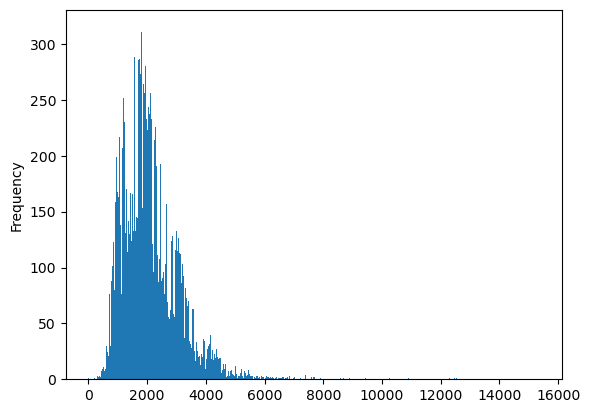

In [63]:
data.sqft_living.plot(kind='hist', bins=1000)

In [64]:
skew(data['sqft_living'])

1.6110785161352401

sqft_living is somewhat skewed to the right and so not normally distributed.

<AxesSubplot:ylabel='Frequency'>

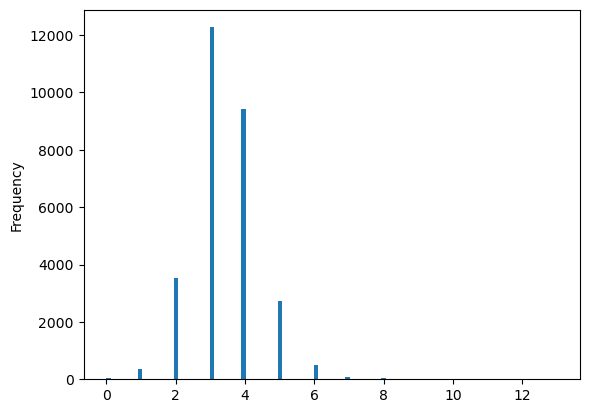

In [65]:
data.bedrooms.plot(kind='hist', bins=100)

In [66]:
skew(data['bedrooms'])

0.5060726439825238

bedrooms is less skewed to the right and so somewhat not normally distributed.

<AxesSubplot:ylabel='Frequency'>

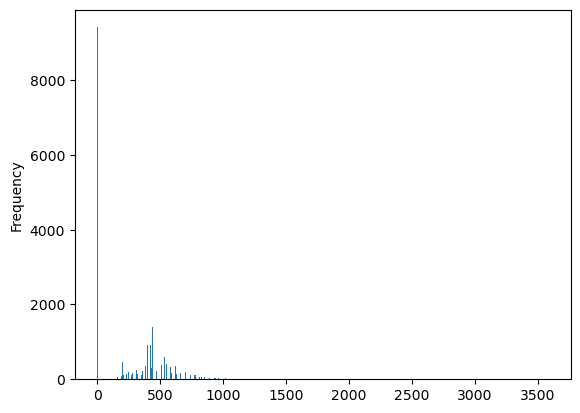

In [67]:
data.sqft_garage.plot(kind='hist', bins=1000)

In [68]:
skew(data['sqft_garage'])

0.6418671177202289

sqft_garage is also less skewed to the right and so somewhat not normally distributed.

<AxesSubplot:ylabel='Frequency'>

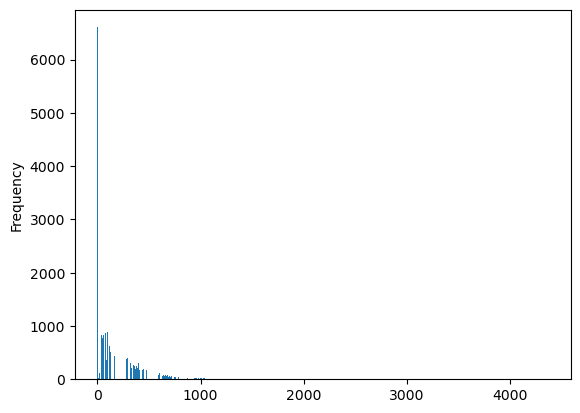

In [69]:
data.sqft_patio.plot(kind='hist', bins=1000)

In [70]:
skew(data['sqft_patio'])

2.3589906964522265

sqft_patio is somewhat skewed to the right and so not normally distributed.

<AxesSubplot:ylabel='Frequency'>

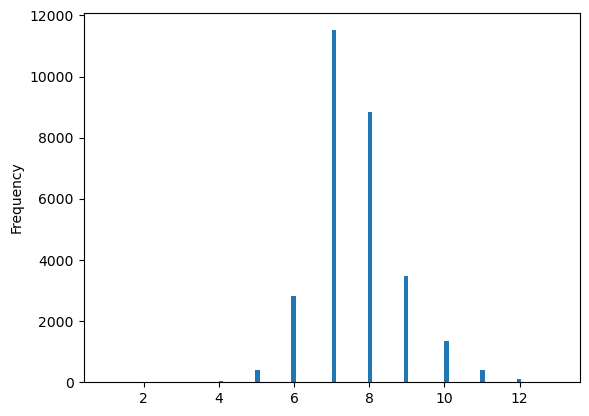

In [71]:
data.grade_num.plot(kind='hist', bins=100)

In [72]:
skew(data['grade_num'])

0.669007645530176

grade_num is also less skewed to the right and so somewhat not normally distributed.

<AxesSubplot:ylabel='Frequency'>

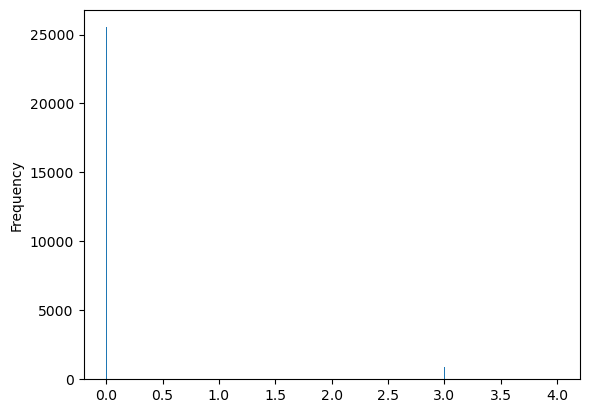

In [73]:
data.view_num.plot(kind='hist', bins=1000)

In [74]:
skew(data['view_num'])

2.8579656493984533

view_num is somewhat skewed to the right and so not normally distributed.

### Start building log price/sqft living model based on non-linearity issues (in residual plots and partial regression plots) and non-normal issues in histograms.

In [75]:
y = df['price']

In [76]:
y_log = np.log(y)

<AxesSubplot:ylabel='Frequency'>

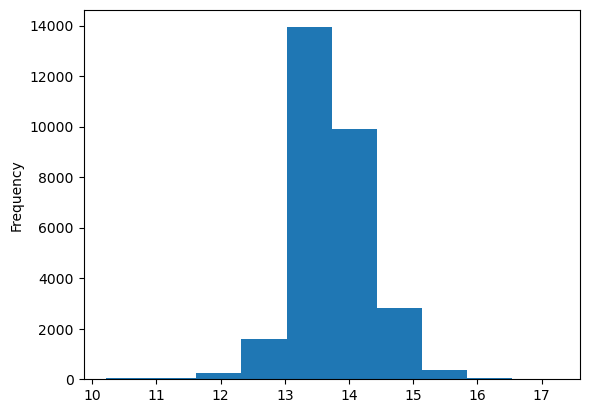

In [77]:
y_log.plot(kind ='hist')

Y_log distribution is more normal than y distribution.

In [78]:
df_X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  29022 non-null  int64
 1   bedrooms     29022 non-null  int64
 2   sqft_garage  29022 non-null  int64
 3   sqft_patio   29022 non-null  int64
 4   grade_num    29022 non-null  int32
 5   view_num     29022 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 1.4 MB


In [79]:
df_X2_log_living = df_X2.copy()

In [80]:
df_X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  29022 non-null  int64
 1   bedrooms     29022 non-null  int64
 2   sqft_garage  29022 non-null  int64
 3   sqft_patio   29022 non-null  int64
 4   grade_num    29022 non-null  int32
 5   view_num     29022 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 1.4 MB


In [81]:
df_X2_log_living['sqft_living_log']= np.log(df_X2_log_living['sqft_living'])

In [82]:
df_X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29022 entries, 0 to 30154
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqft_living  29022 non-null  int64
 1   bedrooms     29022 non-null  int64
 2   sqft_garage  29022 non-null  int64
 3   sqft_patio   29022 non-null  int64
 4   grade_num    29022 non-null  int32
 5   view_num     29022 non-null  int64
dtypes: int32(1), int64(5)
memory usage: 1.4 MB


In [83]:
df_X2_log_living= df_X2_log_living.drop("sqft_living", axis=1)

<AxesSubplot:ylabel='Frequency'>

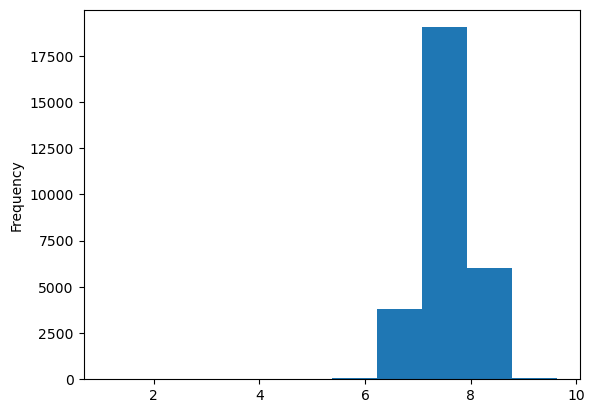

In [84]:
df_X2_log_living['sqft_living_log'].plot(kind='hist', bins=10)

sqft_living_log is more normally distributed than sqft_living distribution.

In [85]:
model_log_pr_liv = sm.OLS(y_log, sm.add_constant(df_X2_log_living))
model_log_pr_liv_results = model_log_pr_liv.fit()


In [86]:
model_log_pr_liv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4025.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:17:19   Log-Likelihood:                -16894.
No. Observations:               29022   AIC:                         3.380e+04
Df Residuals:                   29015   BIC:                         3.386e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               9.1121      0.063    144.504      0.000       8.988       9.236
bedrooms           -0.0046      0.004     -1.282      0.200      -0.012       0.002
sqft_garage        -0.0002   1.07e-05    -17.434      0.000      -0.000      -0.000
sqft_patio          0.0001   1.14e-05      8.891      0.000    7.93e-05       0.000
grade_num           0.2077      0.003     61.647      0.000       0.201       0.214
view_num            0.0833      0.003     26.768      0.000       0.077       0.089
sqft_living_log     0.4060      0.011     36.986      0.000       0.384       0.427
==============================================================================
Omnibus:                     6288.015   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62913.505
Skew:                          -0.757   Prob(JB):                         0.00
Kurtosis:                      10.052   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

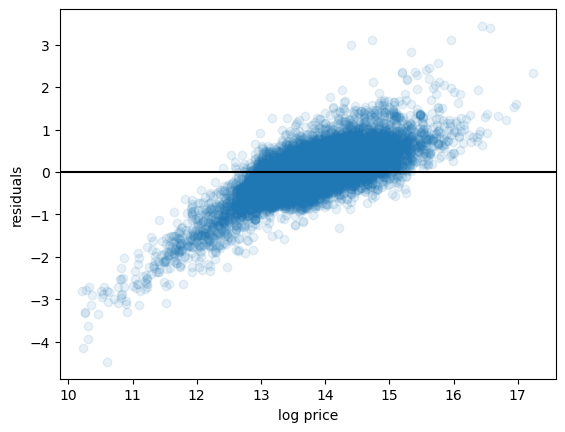

In [87]:
fig, ax = plt.subplots()

ax.scatter(y_log, model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

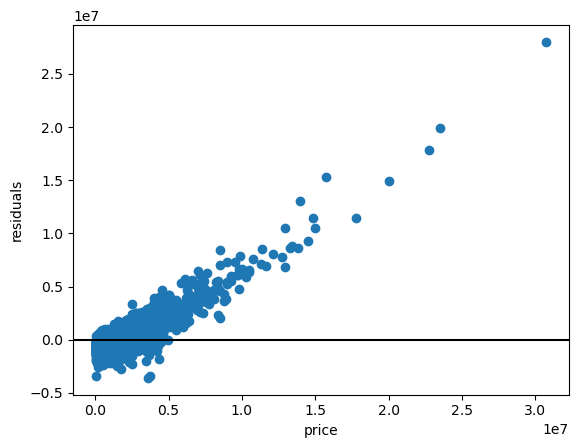

In [88]:
fig, ax = plt.subplots()

ax.scatter(df["price"], model_2575_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("price")
ax.set_ylabel("residuals");

Modest improvement in randomness of residuals,  (from top to bottom chart). There still are non-linearity issues, and maybe heterskedaticity.

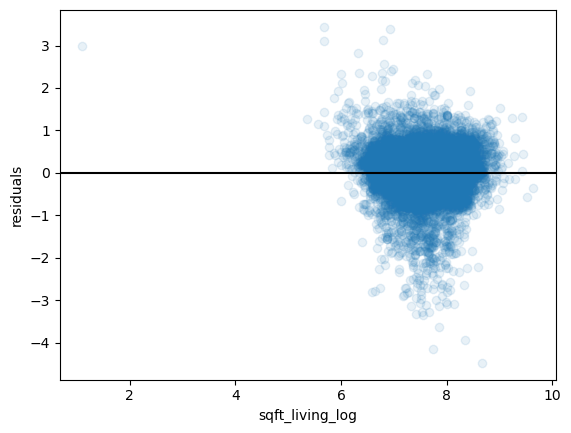

In [89]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_living_log'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living_log")
ax.set_ylabel("residuals");

Less heteroskedaticity than unlogged plot but residuals are somewhat larger in the middle suggesting some heteroskedaticity.

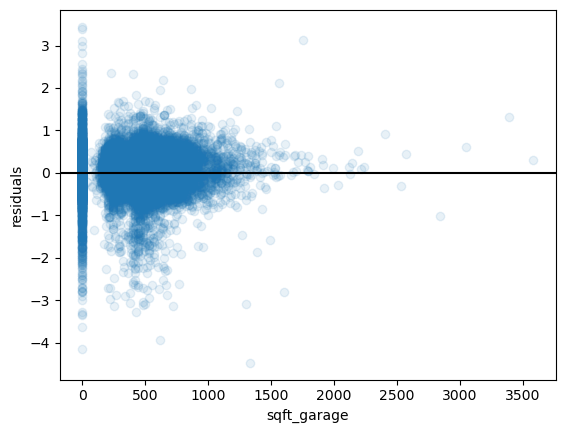

In [90]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_garage'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, decreasing, suggesting some heteroskedaticity.

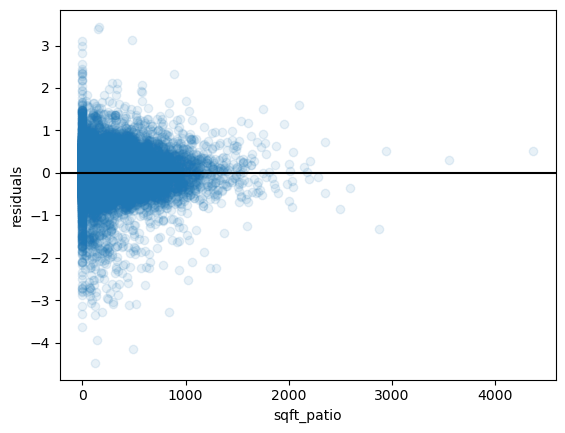

In [91]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['sqft_patio'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, decreasing, suggesting some heteroskedaticity.

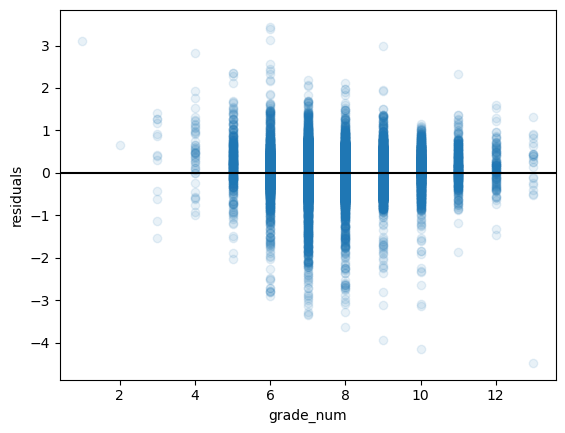

In [92]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['grade_num'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals suggesting some heteroskedaticity.

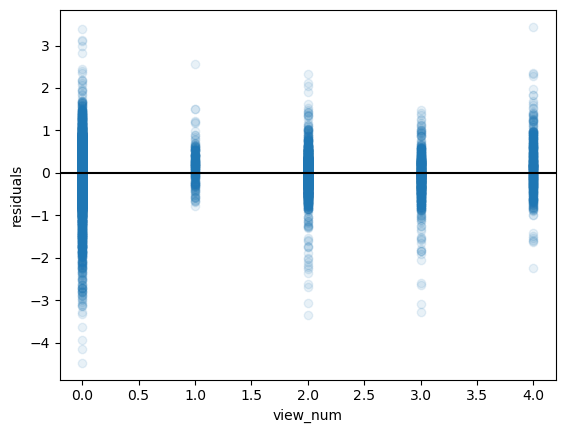

In [93]:
fig, ax = plt.subplots()

ax.scatter(df_X2_log_living['view_num'], model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num")
ax.set_ylabel("residuals");

Variance of residuals are somewhat consistent, suggesting homoskedaticity.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


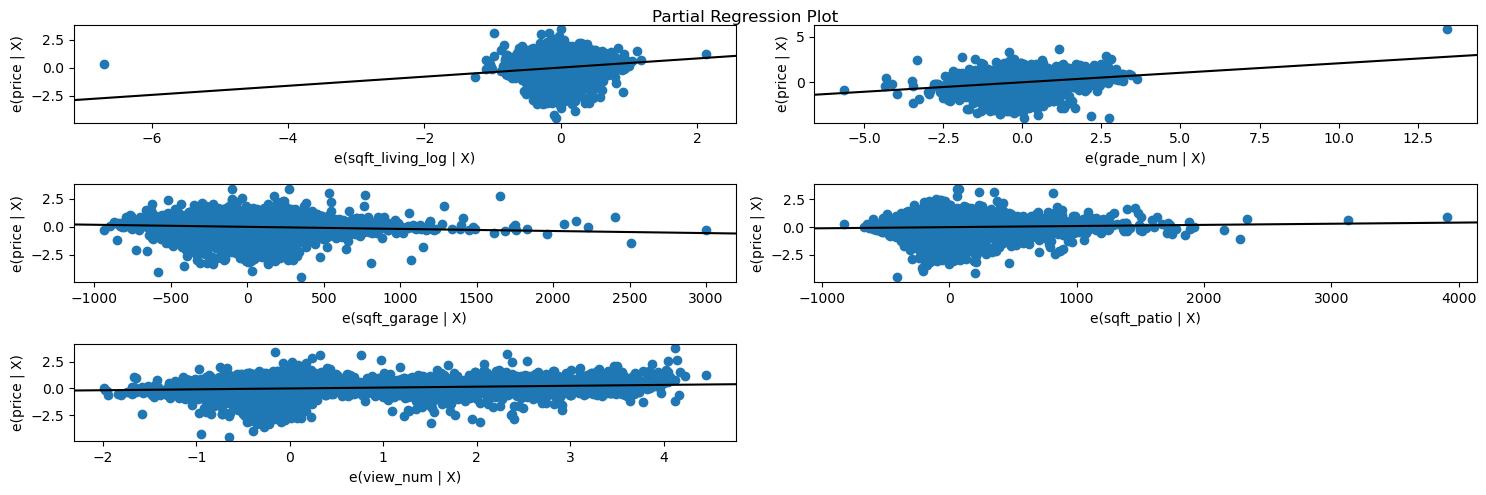

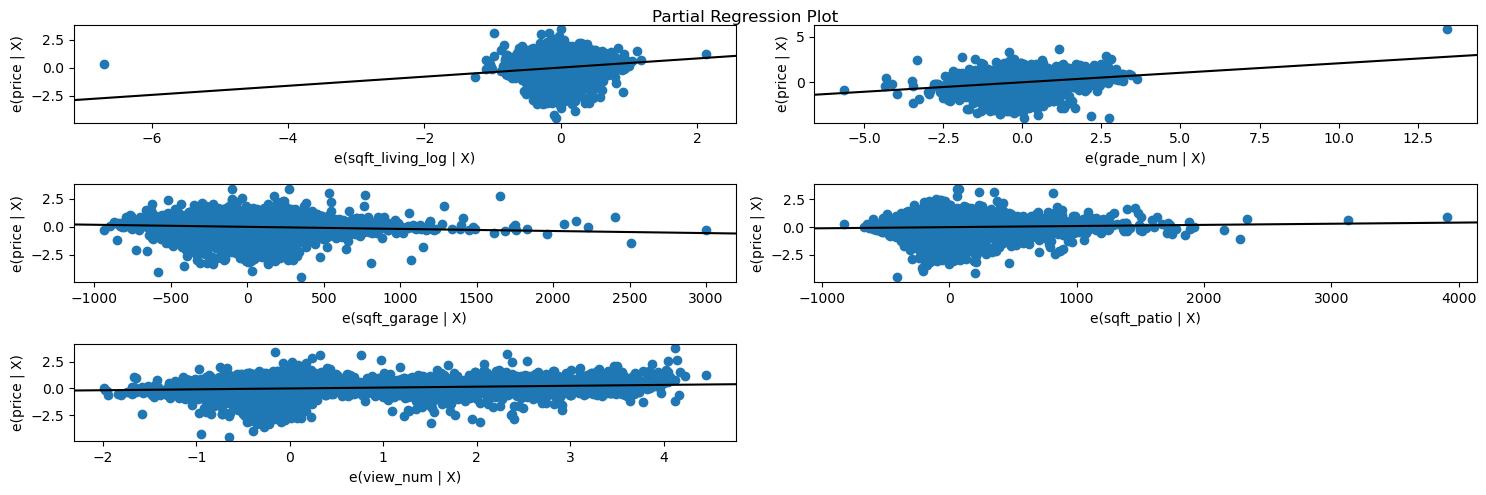

In [94]:
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(model_log_pr_liv_results, exog_idx=["sqft_living_log", "grade_num", "sqft_garage","sqft_patio", "view_num"], fig=fig)

There are some non-linear patterns suggesting some non-linearity or heteroskedaticity in patiosqft and garagesqft.

Analyze potential outliers of 0 (and heteroskedaticity, inflamed by 0 values) in sqftgarage and patio (and bedrooms) and looking 0 values for data entry errors:

In [95]:
data.sqft_garage.value_counts().sort_index()

0       9411
1          1
40         1
70         2
80         5
        ... 
2570       1
2840       1
3050       1
3390       1
3580       1
Name: sqft_garage, Length: 403, dtype: int64

In [96]:
data.sqft_patio.value_counts().sort_index()

0       6605
8          1
10        20
12         1
14         1
        ... 
2590       1
2880       1
2940       1
3550       1
4370       1
Name: sqft_patio, Length: 521, dtype: int64

In [97]:
data.bedrooms.value_counts().sort_index()

0        41
1       375
2      3535
3     12272
4      9429
5      2741
6       493
7        80
8        37
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64

In [98]:
data.sqft_living.mean()

2128.358934601337

0 bedrooms dont make sense because houses have significant sqfootage (larger than studios). Zero values in garage and patio make sense as many houses don't have these, but they still may be outliers.

<AxesSubplot:xlabel='sqft_garage', ylabel='sqft_patio'>

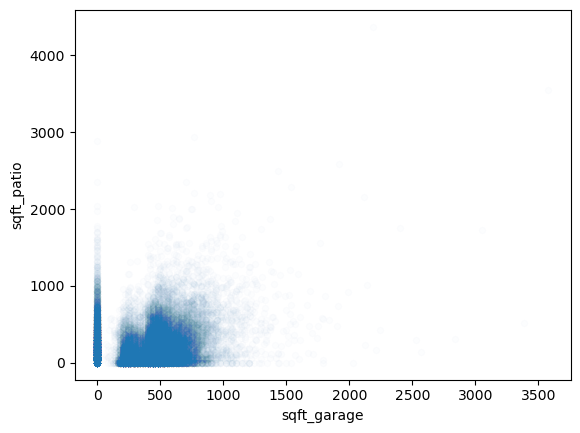

In [99]:
df_X2_log_living.plot(kind = 'scatter', x = 'sqft_garage', y='sqft_patio', alpha = .01)

fairly low crossover between 0's , thus dropping them would eliminate large part of dataset.

Check normality of residuals

<AxesSubplot:ylabel='Frequency'>

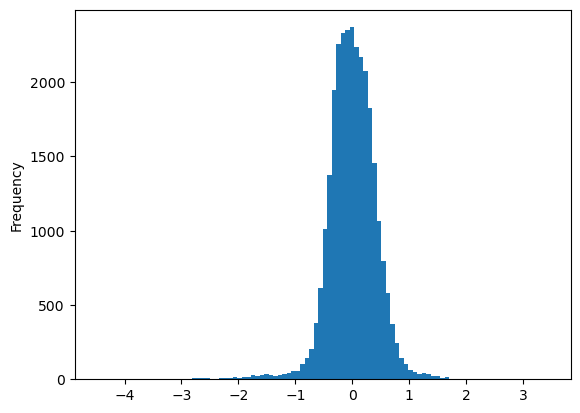

In [100]:
model_log_pr_liv_results.resid.plot(kind ='hist', bins = 100)

Residuals appear fairly normal for log price&sqftliving model and are a large improvement from non-log model. However, the Jarque-Bera null hypothesis of normality is rejected. Skewness is slightly negative and improved from high positives in previous model.  Kurtosis is high.

## New model with more log tranformed variables (sqft_patio,sqft_garage) and 0 bedroom houses removed and remove bedrooms as predictor.  Also create dummy var's for whether house has garage or patio.  The aim is to improve on non-linearity issue, heteroskedaticity issues and non-normality issues and to improve rsquared.

initialize X3 df and remove 0 bedroom houses.

In [101]:
df_X3_logs = df_X2_log_living

In [102]:
df_X3_logs['y_log']=y_log

In [103]:
df_X3_logs = df_X3_logs.drop(df_X3_logs.loc[df_X3_logs['bedrooms']==0].index)

In [104]:
df_X3_logs.describe()

,bedrooms,sqft_garage,sqft_patio,grade_num,view_num,sqft_living_log,y_log
count,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000
mean,3.439357,336.211587,216.121252,7.635382,0.300576,7.567615,13.738000
std,0.970416,285.854606,246.563226,1.152907,0.861905,0.441677,0.586109
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.098612,10.216837
25%,3.000000,0.000000,40.000000,7.000000,0.000000,7.272398,13.377006
50%,3.000000,400.000000,140.000000,7.000000,0.000000,7.570443,13.670485
75%,4.000000,510.000000,310.000000,8.000000,0.000000,7.874739,14.086682
max,13.000000,3580.000000,4370.000000,13.000000,4.000000,9.639522,17.241401


In [105]:
df_X3_logs= df_X3_logs.drop("bedrooms", axis=1)

Create two dummy variables for whether house has garage and patio.

In [106]:
garage_yes = df_X3_logs['sqft_garage'].map(lambda x: 0 if x==0 else 1)

In [107]:
patio_yes = df_X3_logs['sqft_patio'].map(lambda x: 0 if x==0 else 1)

In [108]:
df_X3_logs['garage_yes']=garage_yes

In [109]:
df_X3_logs['patio_yes']=patio_yes

Substitute .1 in for 0 values in sqft gar & patio in order to log transform.  .1 is equivalent to 0 as both mean essentially no garage or patio.

In [110]:
df_X3_logs['sqft_garage'] = df_X3_logs['sqft_garage'].map(lambda x: .1 if x==0 else x)

In [111]:
df_X3_logs['sqft_patio'] = df_X3_logs['sqft_patio'].map(lambda x: .1 if x==0 else x)

In [112]:
#df_X3_logs.describe()

In [113]:
df_X3_logs['sqft_garage_log']= np.log(df_X3_logs['sqft_garage'])

df_X3_logs= df_X3_logs.drop("sqft_garage", axis=1)

In [114]:
df_X3_logs['sqft_patio_log']= np.log(df_X3_logs['sqft_patio'])

df_X3_logs= df_X3_logs.drop("sqft_patio", axis=1)

In [115]:
df_X3_logs.describe()

,grade_num,view_num,sqft_living_log,y_log,garage_yes,patio_yes,sqft_garage_log,sqft_patio_log
count,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000,28981.000000
mean,7.635382,0.300576,7.567615,13.738000,0.676512,0.773162,3.403392,3.563413
std,1.152907,0.861905,0.441677,0.586109,0.467815,0.418794,3.959378,3.268021
min,1.000000,0.000000,1.098612,10.216837,0.000000,0.000000,-2.302585,-2.302585
25%,7.000000,0.000000,7.272398,13.377006,0.000000,1.000000,-2.302585,3.688879
50%,7.000000,0.000000,7.570443,13.670485,1.000000,1.000000,5.991465,4.941642
75%,8.000000,0.000000,7.874739,14.086682,1.000000,1.000000,6.234411,5.736572
max,13.000000,4.000000,9.639522,17.241401,1.000000,1.000000,8.183118,8.382518


In [116]:
df_X3_logs.corr()

,grade_num,view_num,sqft_living_log,y_log,garage_yes,patio_yes,sqft_garage_log,sqft_patio_log
grade_num,1.000000,0.209331,0.720184,0.621400,0.353333,0.254709,0.382501,0.301046
view_num,0.209331,1.000000,0.208744,0.278210,-0.035780,0.103912,-0.029911,0.148537
sqft_living_log,0.720184,0.208744,1.000000,0.594424,0.335307,0.309592,0.367679,0.359002
y_log,0.621400,0.278210,0.594424,1.000000,0.148768,0.198133,0.169316,0.244905
garage_yes,0.353333,-0.035780,0.335307,0.148768,1.000000,0.118955,0.996556,0.118802
patio_yes,0.254709,0.103912,0.309592,0.198133,0.118955,1.000000,0.131214,0.972272
sqft_garage_log,0.382501,-0.029911,0.367679,0.169316,0.996556,0.131214,1.000000,0.134321
sqft_patio_log,0.301046,0.148537,0.359002,0.244905,0.118802,0.972272,0.134321,1.000000


High correlations between dummies and sqft_garage_log	sqft_patio_log may suggest multicollinearity/confounding variable issues, but domain knowledge says that both the existense of garage/patio and the size should have seperate effects on price.	

seperating out dep. var.:

In [117]:
y_log_X3 = df_X3_logs['y_log'] 

In [118]:
df_X3_logs= df_X3_logs.drop("y_log", axis=1)

In [119]:
model_X3_logs = sm.OLS(y_log_X3, sm.add_constant(df_X3_logs))
model_X3_logs_results = model_X3_logs.fit()


In [120]:
model_X3_logs_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  y_log   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3504.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:17:22   Log-Likelihood:                -16752.
No. Observations:               28981   AIC:                         3.352e+04
Df Residuals:                   28973   BIC:                         3.359e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.9733      0.065    137.825      0.000       8.846       9.101
grade_num           0.2094      0.003     63.784      0.000       0.203       0.216
view_num            0.0806      0.003     26.092      0.000       0.075       0.087
sqft_living_log     0.4136      0.009     46.881      0.000       0.396       0.431
garage_yes          0.4536      0.072      6.261      0.000       0.312       0.596
patio_yes          -0.2099      0.027     -7.835      0.000      -0.262      -0.157
sqft_garage_log    -0.0683      0.009     -7.859      0.000      -0.085      -0.051
sqft_patio_log      0.0280      0.004      7.979      0.000       0.021       0.035
==============================================================================
Omnibus:                     6507.496   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            63411.590
Skew:                          -0.803   Prob(JB):                         0.00
Kurtosis:                      10.067   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

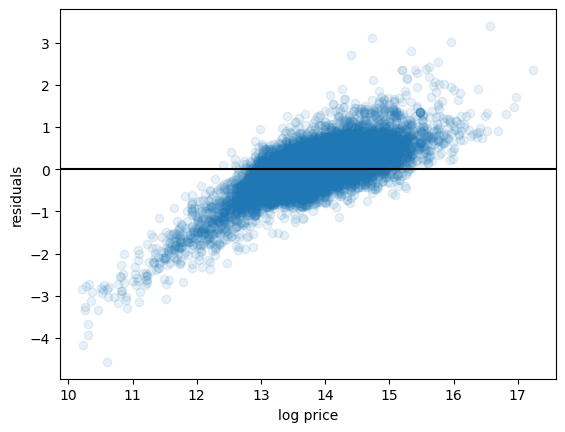

In [121]:
fig, ax = plt.subplots()

ax.scatter(y_log_X3, model_X3_logs_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

previous residual scatter

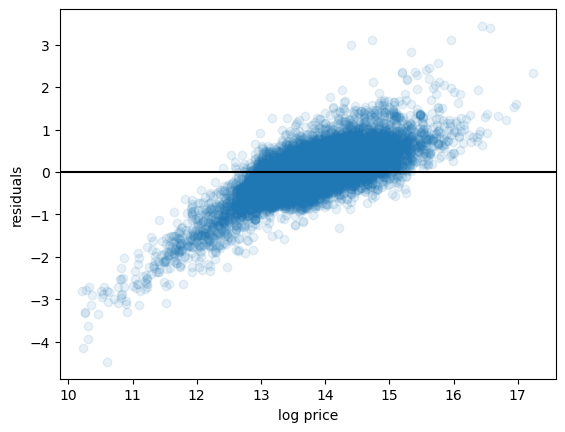

In [122]:
fig, ax = plt.subplots()

ax.scatter(y_log, model_log_pr_liv_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

Very modest if any improvement in lowering the upward trend in residuals. Thus there still are non-linearity issues, and maybe heterskedaticity.

Below, check for heterskedaticity, normality of residuals, non linearity.

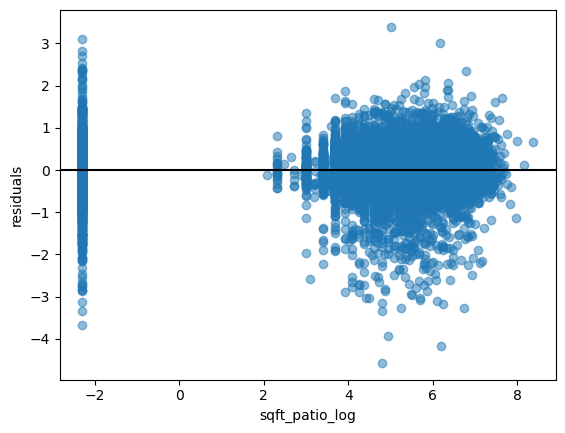

In [123]:
fig, ax = plt.subplots()

ax.scatter(df_X3_logs["sqft_patio_log"], model_X3_logs_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio_log")
ax.set_ylabel("residuals");


There is a decreasing trend in residuals, cause by 0 values, suggesting possible heterosedaticity.

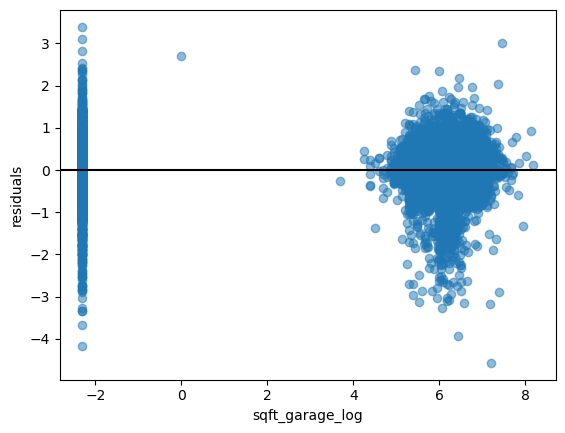

In [124]:
fig, ax = plt.subplots()

ax.scatter(df_X3_logs["sqft_garage_log"], model_X3_logs_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage_log")
ax.set_ylabel("residuals");


There is a decreasing trend in residuals, cause by 0 values, suggesting possible heterosedaticity.

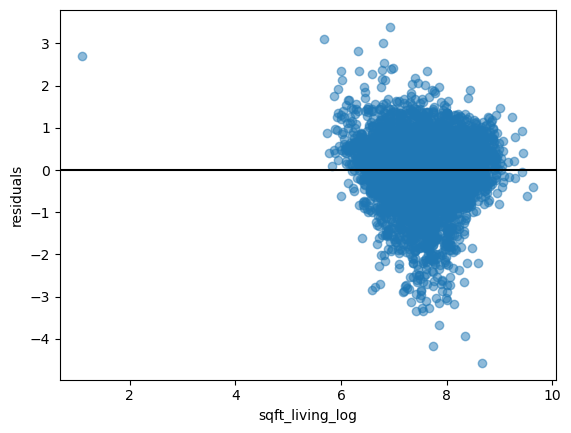

In [125]:
fig, ax = plt.subplots()

ax.scatter(df_X3_logs["sqft_living_log"], model_X3_logs_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living_log")
ax.set_ylabel("residuals");


There may be a pattern in the variance of residuals suggesting some heteroskedaticity.

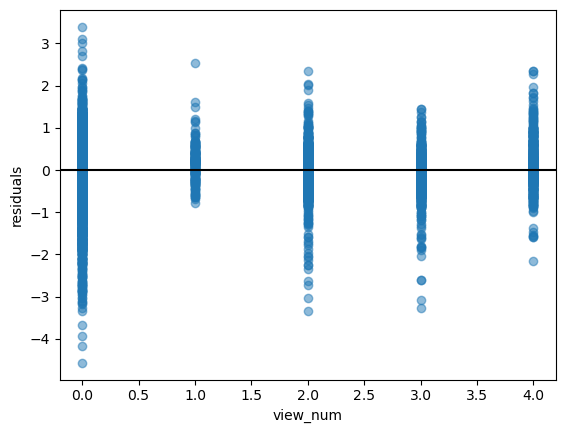

In [126]:
fig, ax = plt.subplots()

ax.scatter(df_X3_logs["view_num"], model_X3_logs_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num")
ax.set_ylabel("residuals");

Variance of residuals are somewhat consistent, suggesting homoskedaticity.

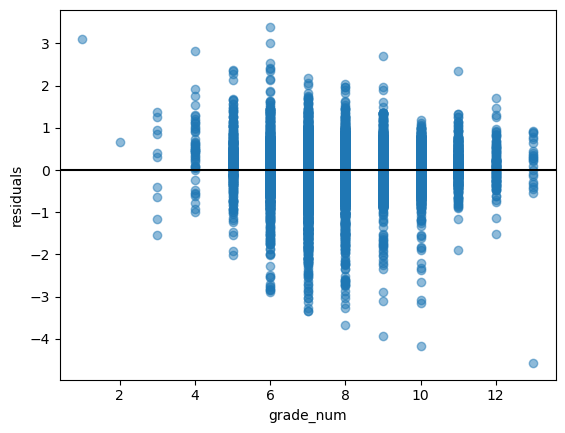

In [127]:
fig, ax = plt.subplots()

ax.scatter(df_X3_logs["grade_num"], model_X3_logs_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num")
ax.set_ylabel("residuals");


There may be a pattern in the variance of residuals suggesting some heteroskedaticity.

model_X3_logs has similar issues of non-linearity, non-normality (Jarque-Beta test) heteroskedacities, although heteroskedacities are improved. But   0 values in garage and patio variables are still problematic.

### Thus, in final model, log grade and view due to non-normality(despite improvement) and some heteroskedaticity. 
### Add categorical variable, Waterfront, to increase rsquared.

### Also drop outliers in sqft_gar and sqft_pat variables to decrease heteroskedaticity.  (And drop associated dummy variables as 0 patio/no garage houses removed.)

In [128]:
df_X4_drop = df_X3_logs.copy()

In [129]:
y_drop_X4=y_log_X3.copy()

In [130]:
df_X4_drop['y_drop_X4']=y_drop_X4

In [131]:
df_X4_drop['WaterFront_Yes']= df['waterfront_YES'] 

remove 0 outliers.

In [132]:
df_X4_drop = df_X4_drop.drop(df_X4_drop.loc[df_X4_drop['sqft_garage_log']<-2].index)

In [133]:
df_X4_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19606 entries, 3 to 30154
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grade_num        19606 non-null  int32  
 1   view_num         19606 non-null  int64  
 2   sqft_living_log  19606 non-null  float64
 3   garage_yes       19606 non-null  int64  
 4   patio_yes        19606 non-null  int64  
 5   sqft_garage_log  19606 non-null  float64
 6   sqft_patio_log   19606 non-null  float64
 7   y_drop_X4        19606 non-null  float64
 8   WaterFront_Yes   19606 non-null  uint8  
dtypes: float64(4), int32(1), int64(3), uint8(1)
memory usage: 1.3 MB


In [134]:
df_X4_drop = df_X4_drop.drop(df_X4_drop.loc[df_X4_drop['sqft_patio_log']<-2].index)

In [135]:
df_X4_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15834 entries, 3 to 30153
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   grade_num        15834 non-null  int32  
 1   view_num         15834 non-null  int64  
 2   sqft_living_log  15834 non-null  float64
 3   garage_yes       15834 non-null  int64  
 4   patio_yes        15834 non-null  int64  
 5   sqft_garage_log  15834 non-null  float64
 6   sqft_patio_log   15834 non-null  float64
 7   y_drop_X4        15834 non-null  float64
 8   WaterFront_Yes   15834 non-null  uint8  
dtypes: float64(4), int32(1), int64(3), uint8(1)
memory usage: 1.0 MB


In [136]:
y_X4_drops =df_X4_drop['y_drop_X4'].copy()

In [137]:
df_X4_drop= df_X4_drop.drop("garage_yes", axis=1)

In [138]:
df_X4_drop= df_X4_drop.drop("patio_yes", axis=1) 

In [139]:
df_X4_drop['grade_num_log']= np.log(df_X4_drop['grade_num'])

df_X4_drop= df_X4_drop.drop("grade_num", axis=1)




add 1 to view_num so don't have to log zero value

In [140]:
df_X4_drop['view_num'] = df_X4_drop['view_num'].map(lambda x: x+1)

df_X4_drop['view_num_log']= np.log(df_X4_drop['view_num'])
df_X4_drop= df_X4_drop.drop("view_num", axis=1)

In [141]:
df_X4_drop= df_X4_drop.drop("y_drop_X4", axis=1)

In [142]:
y_drop_X4

0        13.422468
1        13.732129
2        12.647548
3        13.560618
4        13.292106
           ...    
30150    14.256986
30151    14.087825
30152    13.592367
30153    13.560618
30154    13.122363
Name: y_log, Length: 28981, dtype: float64

In [143]:
df_X4_drop

,sqft_living_log,sqft_garage_log,sqft_patio_log,WaterFront_Yes,grade_num_log,view_num_log
3,7.677864,5.298317,5.598422,0,2.197225,1.098612
4,7.021084,6.309918,3.401197,0,1.945910,0.000000
7,7.702556,6.086775,5.327876,0,2.079442,0.000000
8,7.757906,6.086775,4.248495,0,2.079442,0.000000
9,7.999679,6.291569,5.135798,0,2.079442,1.098612
...,...,...,...,...,...,...
30147,7.649693,6.086775,3.688879,0,1.945910,0.000000
30148,8.039157,6.565265,4.700480,0,2.079442,0.000000
30149,7.146772,5.298317,4.094345,0,2.079442,0.000000
30152,7.390181,5.480639,4.700480,0,1.945910,0.000000


In [144]:
model_X4_drop = sm.OLS(y_X4_drops, sm.add_constant(df_X4_drop))
model_X4_drop_results = model_X4_drop.fit()


In [145]:
model_X4_drop_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              y_drop_X4   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     2531.
Date:                Wed, 17 May 2023   Prob (F-statistic):               0.00
Time:                        11:17:23   Log-Likelihood:                -8743.3
No. Observations:               15834   AIC:                         1.750e+04
Df Residuals:                   15827   BIC:                         1.755e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.7319      0.072     93.360      0.000       6.591       6.873
sqft_living_log     0.4971      0.013     37.352      0.000       0.471       0.523
sqft_garage_log    -0.1062      0.010    -10.208      0.000      -0.127      -0.086
sqft_patio_log      0.0423      0.004     10.332      0.000       0.034       0.050
WaterFront_Yes      0.3342      0.031     10.843      0.000       0.274       0.395
grade_num_log       1.7753      0.037     47.836      0.000       1.703       1.848
view_num_log        0.1138      0.009     12.842      0.000       0.096       0.131
==============================================================================
Omnibus:                     3946.495   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32350.408
Skew:                          -0.969   Prob(JB):                         0.00
Kurtosis:                       9.729   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
df_X4_drop.corr()

,sqft_living_log,sqft_garage_log,sqft_patio_log,WaterFront_Yes,grade_num_log,view_num_log
sqft_living_log,1.000000,0.516483,0.313917,0.102699,0.720475,0.232556
sqft_garage_log,0.516483,1.000000,0.253390,0.070055,0.459446,0.067089
sqft_patio_log,0.313917,0.253390,1.000000,0.096536,0.250268,0.216588
WaterFront_Yes,0.102699,0.070055,0.096536,1.000000,0.109460,0.328209
grade_num_log,0.720475,0.459446,0.250268,0.109460,1.000000,0.240620
view_num_log,0.232556,0.067089,0.216588,0.328209,0.240620,1.000000


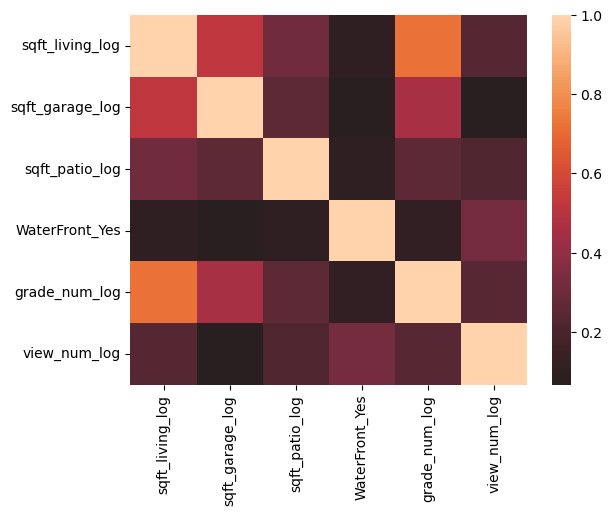

In [147]:
sns.heatmap(df_X4_drop.corr(), center=0);

Multicollinearity is low, all correlations below .75.

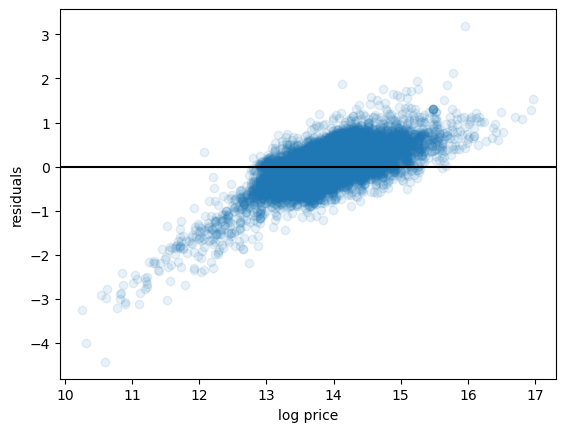

In [148]:
fig, ax = plt.subplots()

ax.scatter(y_X4_drops, model_X4_drop_results.resid, alpha=.1)
ax.axhline(y=0, color="black")
ax.set_xlabel("log price")
ax.set_ylabel("residuals");

This residual plot is similar to the previous model residual plot, (increasing), thus there are still some heteroskedaticity and non-linearity issues.

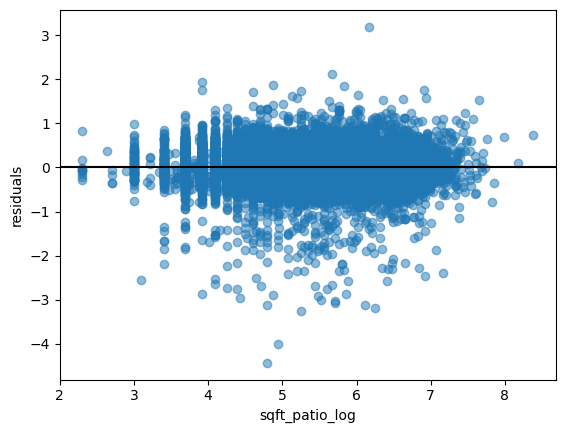

In [149]:
fig, ax = plt.subplots()

ax.scatter(df_X4_drop["sqft_patio_log"], model_X4_drop_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_patio_log")
ax.set_ylabel("residuals");

Above is homoskedastic after drops of outliers.

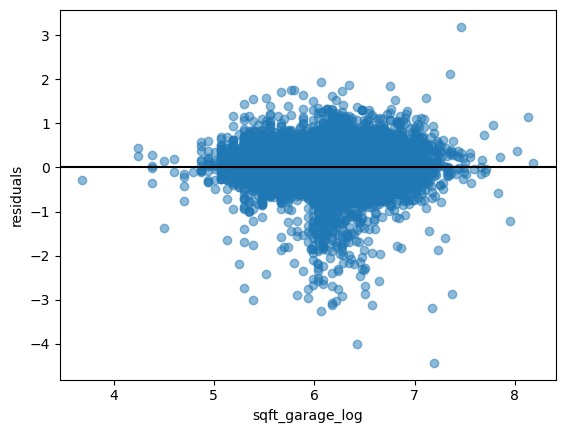

In [150]:
fig, ax = plt.subplots()

ax.scatter(df_X4_drop["sqft_garage_log"], model_X4_drop_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_garage_log")
ax.set_ylabel("residuals");

Above is homoskedastic after drops of outliers.

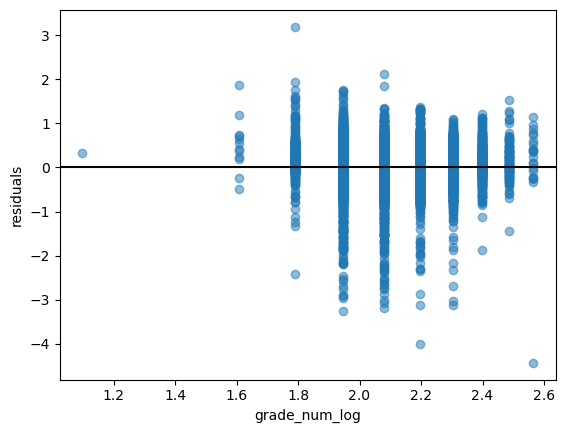

In [151]:
fig, ax = plt.subplots()

ax.scatter(df_X4_drop["grade_num_log"], model_X4_drop_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("grade_num_log")
ax.set_ylabel("residuals");

There is a pattern in the variance of residuals, suggesting some heteroskedaticity.

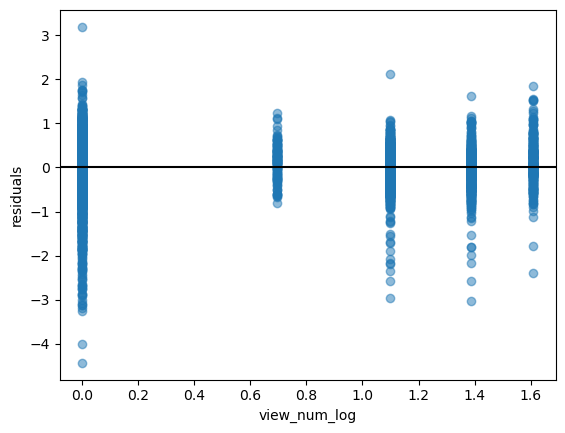

In [152]:
fig, ax = plt.subplots()

ax.scatter(df_X4_drop["view_num_log"], model_X4_drop_results.resid, alpha =.5)
ax.axhline(y=0, color="black")
ax.set_xlabel("view_num_log")
ax.set_ylabel("residuals");

Variance of residuals are somewhat consistent, suggesting homoskedaticity.

<AxesSubplot:ylabel='Frequency'>

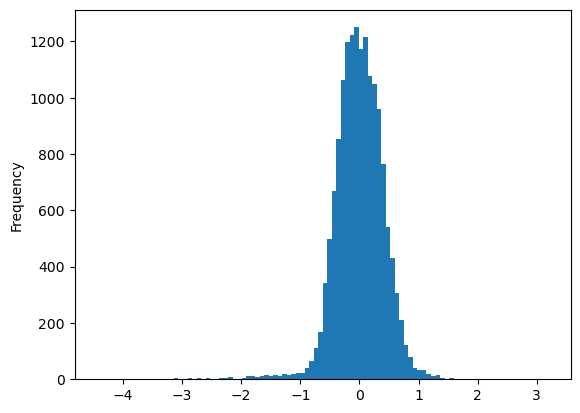

In [153]:
model_X4_drop_results.resid.plot(kind ='hist', bins = 100)

Residual plot appears normally distributed, and is improved from previous model, however J-B test still failed suggesting non-normality.

# Results/Recommendations/Next steps

### Interpretation of coefficients

Formula for interpreting raw predictor vs log target:

For each increase of 1 unit in x we see an associated change of ((e^B-1)*100)% in y

Formula for interpreting log predictor vs log target:

For each increase of p% in x we see an associated change of ((e^(B* log((100+p)/100))-1)*100)% in y

In [154]:
RawPredictors = ['WaterFront_Yes']
LogPredictors = ['sqft_living_log', 'sqft_garage_log', 'sqft_patio_log', 'grade_num_log', 'view_num_log']
RawBetas = [0.3342]
LogBetas =[ 0.4971,-0.1062, 0.0423, 1.7753, 0.1138]


def RawDLogI(RawPredictors, RawBetas): 
    for name, beta in zip(RawPredictors, RawBetas):
        PerChange = ((np.exp(beta)-1)*100)
        print ('For each increase of 1 unit in {} we see an associated change of {} % in price'.format(name,PerChange))

In [155]:
RawDLogI(RawPredictors, RawBetas)

For each increase of 1 unit in WaterFront_Yes we see an associated change of 39.682248013594524 % in price


In [156]:
def LogDLogI(LogPredictors, LogBetas): 
    for name, beta in zip(LogPredictors, LogBetas):
        PerChangeforP= '((np.exp({}* log((100+p)/100))-1)*100)'.format(beta)
        PerChangefor1= ((np.exp(beta* np.log((100+1)/100))-1)*100)
        print ('For each increase of p% in {} we see an associated change of {}% in price. So for each 1% increase in {} we see an associated change of {}% in price'.format(name,PerChangeforP,name,PerChangefor1)) 

In [157]:
LogDLogI(LogPredictors, LogBetas)

For each increase of p% in sqft_living_log we see an associated change of ((np.exp(0.4971* log((100+p)/100))-1)*100)% in price. So for each 1% increase in sqft_living_log we see an associated change of 0.49585626501302826% in price
For each increase of p% in sqft_garage_log we see an associated change of ((np.exp(-0.1062* log((100+p)/100))-1)*100)% in price. So for each 1% increase in sqft_garage_log we see an associated change of -0.10561669992158462% in price
For each increase of p% in sqft_patio_log we see an associated change of ((np.exp(0.0423* log((100+p)/100))-1)*100)% in price. So for each 1% increase in sqft_patio_log we see an associated change of 0.04209875854999101% in price
For each increase of p% in grade_num_log we see an associated change of ((np.exp(1.7753* log((100+p)/100))-1)*100)% in price. So for each 1% increase in grade_num_log we see an associated change of 1.7821768115813041% in price
For each increase of p% in view_num_log we see an associated change of ((np.e

In [158]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 
y_pred = model_X4_drop_results.predict(sm.add_constant(df_X4_drop)) 

mean_squared_error(y_pred, y_X4_drops, squared=False)


0.42031348513230654

This is the mean squared error in terms of log(Y). Ideally would convert to terms of change in Y.


### Next steps

- try to improve on rsquared/reduce small non-linearity by using the lat/long scatter map to create dummy variables for specific geographic areas (would likely be about 10).

- Also testing interaction variables (e.g. differing lot sizes and house sizes for different geographic areas.)

